In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set_palette("Blues_d")

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [27]:
wars = pd.read_csv('data/deaths_gdp.csv')
wars.head(10)

,War,Location,GDP_range,Deaths
0,Taiping Rebellion,china,low,25000000
1,Crimean War,uk,high,383000
2,Panthay Rebellion,china,low,945000
3,Indian Rebellion of 1857,india,low,900000
4,American Civil War,united states,high,825000
5,Dungan Revolt,china,low,14000000
6,French intervention in Mexico,mexico,low,49287
7,Paraguayan War,south america,low,750000
8,Ten Years' War,cuba,low,241000
9,Conquest of the Desert,patagonia,low,32500


**Part 1** : We are interested in the **distribution** of number of deaths for all wars in our dataset. A **histogram** allows us to visualize this distribution. 

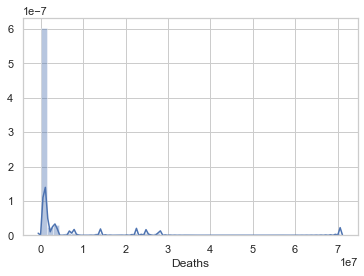

In [30]:
deaths = wars['Deaths']
sns.distplot(deaths);

Notice how our data is skewed heavily to the left. This is because the number of deaths varies wildly for each war. A useful method for a better visualization of skewed data is to **transform** the data. We can do this by applying the log function to our data. Run the cell below, which applies a log transformation to the number of deaths per war. 

In [40]:
log_deaths = np.array(np.log10(deaths))

**<span style="color:blue"> In the cell below, use the transformed data defined above, `log_deaths`, to create a histogram of the log number of deaths for each war (1 pt)</span>** 

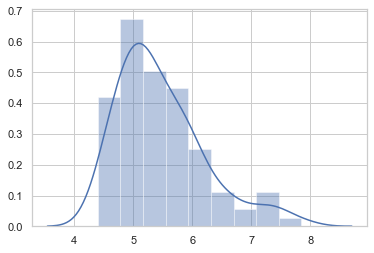

In [34]:
sns.distplot(log_deaths)

**<span style="color:blue"> Now, in the cell below, describe something you learn from the shape of the distribution. (1 pt)</span>** 

*Write your answer here*

**Part 2:**  NumPy is a powerful python library that allows us to perform mathematical calculations on arrays and matrices. Here, our `deaths` variable is an array, thus we can utilize NumPy methods to compute statistics on this data. Two methods that will be useful to us are `np.mean` (calculates the average of an array) and `np.median` (calculates the median of an array). 

**<span style="color:blue"> Below, use the NumPy methods mentioned above to assign `deaths_mean` to the mean and `deaths_median` to the median of the number of deaths. (1 pt)</span>** 

In [80]:
deaths_mean = np.mean(deaths)
deaths_median = np.median(deaths)
mean_str = "{:,}".format(int(deaths_mean))
median_str = "{:,}".format(int(deaths_median))

print("The mean number of deaths in our data is " + mean_str)
print("The median number of deaths in our data is " + median_str)

The mean number of deaths in our data is 2,322,783
The median number of deaths in our data is 197,500


**<span style="color:blue"> In the cell below, describe which statistic is bigger and why that might be.  (1 pt)</span>** 

*Write your answer here*

**Part 3:** 

In [91]:
sample_means = []
for i in np.arange(1000):
    temporary_mean = np.mean(np.random.choice(deaths, 50, replace=False))
    sample_means.append(temporary_mean)

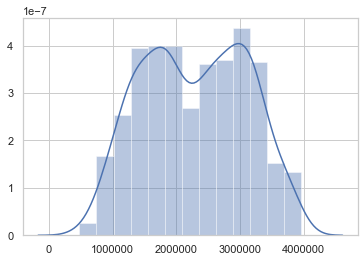

In [92]:
sns.distplot(sample_means)

**Part 4:** What is the mean and standard deviation of the sampling distribution?  

**<span style="color:blue"> In the cell below, use `np.average` to calculate the mean and `np.std` to calculate the standard deviation.  (1 pt)</span>** 

In [108]:
mean_sample = np.average(sample_means)

mean_std = np.std(sample_means)


sample_mean_str = "{:,}".format(int(mean_sample))

std_str = "{:,}".format(int(mean_std))


print("The mean of our sample means is " + sample_mean_str)

print("The standard deviation of the sample means is " + std_str)

The mean of our sample means is 2,293,437
The standard deviation of the sample means is 811,359


**Part 5:** Run the cell which calculates an unknown (but familiar) statistic. 

In [105]:
unknown_statistic = int(np.std(deaths) / np.sqrt(50))

statistic_str = "{:,}".format(int(unknown_statistic))

print(statistic_str)

1,206,521


**<span style="color:blue"> Compare your answer in *Part 4* to this statistic. What are these quantities called? Write your answer below. (1 pt)</span>** 

*Write your answer here*

**Part 6:** The code below 

In [112]:
# Separating data between countries with an L and countries without an L 
countries_with_L = wars[wars['Location'].str.contains('l')]

countries_no_L = wars[~wars['Location'].str.contains('l')]

In [114]:
from scipy import stats

stats.ttest_ind(countries_with_L['Deaths'], countries_no_L['Deaths'], equal_var = False)

Ttest_indResult(statistic=-2.235695299222781, pvalue=0.028267436310602)